In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [21]:
df = pd.DataFrame(
    {'testo': ['punto Enri'],
     'Latitude': [-34.58],
     'Longitude': [-57.66]})

airbnb = pd.DataFrame(
    {'testo': ['airbnb1','airbnb2','airbnb3'],
     'Latitude': [-32.58,-31,-36],
     'Longitude': [-58.66,-56,-57]})

In [22]:
df['Coordinates']  = list(zip(df.Longitude, df.Latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)
# imposto il sistema di coordinate
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(df, crs=crs, geometry='Coordinates')
gdf.head(3)

,Latitude,Longitude,testo,Coordinates
0,-34.58,-57.66,punto Enri,POINT (-57.66 -34.58)


In [23]:
airbnb['Coordinates']  = list(zip(airbnb.Longitude, airbnb.Latitude))
airbnb['Coordinates'] = airbnb['Coordinates'].apply(Point)
# imposto il sistema di coordinate
crs = {'init': 'epsg:4326'}
airbnbgdf = gpd.GeoDataFrame(airbnb, crs=crs, geometry='Coordinates')
airbnbgdf.head(3)

,Latitude,Longitude,testo,Coordinates
0,-32.58,-58.66,airbnb1,POINT (-58.66 -32.58)
1,-31.00,-56.00,airbnb2,POINT (-56 -31)
2,-36.00,-57.00,airbnb3,POINT (-57 -36)


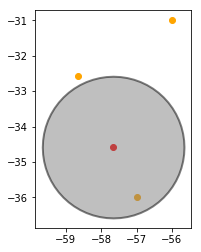

In [24]:
ax=gdf.plot(color='red')
airbnbgdf.plot(ax=ax, color='orange')
# aggiungo un buffer di 2° attorno al punto e lo aggiungo al grafico
gdf.buffer(2).plot(ax=ax, color='gray',edgecolor='black',alpha=0.5,linewidth=2)
plt.show()

In [25]:
# creo una geoseries
buffer=gdf.buffer(2)
# estraggo soltanto gli elementi di airbnbgdf che sono whitin il buffer
airbnbgdf.loc[airbnbgdf.within(buffer.unary_union)]

,Latitude,Longitude,testo,Coordinates
2,-36.0,-57.0,airbnb3,POINT (-57 -36)


# Converto le coordinate in webmercatore (brutto sistema di coordinate)

In [26]:
airbnbgdfM=airbnbgdf.to_crs(epsg=3857)
gdfM=gdf.to_crs(epsg=3857)
# creo un buffer di 260000 metri
bufferM=gdf.to_crs(epsg=3857).buffer(260000)

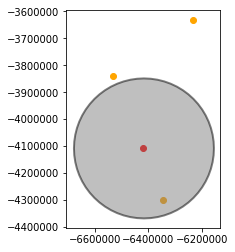

In [27]:
axM=gdfM.plot(color='red')
airbnbgdfM.plot(ax=axM, color='orange')
bufferM.plot(ax=axM, color='gray',edgecolor='black',alpha=0.5,linewidth=2)
plt.show()

In [28]:
# estraggo soltanto gli elementi di airbnbgdf che sono within il buffer
airbnbgdfM.loc[airbnbgdfM.within(bufferM.unary_union)]

,Latitude,Longitude,testo,Coordinates
2,-36.0,-57.0,airbnb3,POINT (-6345210.975216595 -4300621.372044271)
